<a href="https://colab.research.google.com/github/joaomr7/portfolio-data-science/blob/main/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%A3o_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecção de Fraude em Cartão de Crédito

---

Este projeto visa abordar o problema de fraude de cartão de crédito desenvolvendo uma solução de machine learning. Essas fraudes, quando ocorrem, trazem desconforto para clientes, comerciantes e para a instituição financeira que fornece o cartão.

<br>

<center><img src="https://drive.google.com/uc?export=view&id=1y4A3k0U_kSiJq1KMGVgOeDKDK3dHLzKI" align="center" height="400"/></center>

<br>

No Brasil, desde que o titular do cartão tenha agido de maneira responsável e reportado a fraude imediatamente, o **prejuízo recai todo sobre a instituição financeira**, uma vez que era obrigação desta fornecer **segurança ao cliente**. Para ter ideia da gravidade da situação, **1/3 dos brasileiros já foram vítimas** desse tipo de fraude(leia essa notícia em [Canaltech](https://canaltech.com.br/seguranca/13-dos-brasileiros-ja-foram-vitimas-de-fraude-por-cartao-de-credito-223018/)).

Com isso, é importante que as instituições financeiras tenham ótimas soluções para detectar as fraudes. É aí que a **Inteligência Artificial vem com grande força**. Uma vez que existem vários dados de transações bancárias, é praticamente impossível um ser humano analisar tudo e aprender uma forma de detectar as fraudes. Porém com as soluções de IA, essa tarefa torna-se trivial com o poder computacional das máquinas, que, utilizando dessas soluções, tornam-se **poderosas máquinas de encontrar padrões**.

Portanto, o objetivo desse notebook é produzir um modelo de machine learning capaz de detectar o maior número possível de fraudes de cartão de crédito.

## Obtenção dos dados

Os dados originais que serão usados, podem ser obtidos [nesse link](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud).

#### Informações sobre o dataset(conjunto de dados), de acordo com a fonte:
* O dataset é composto por transações **ocorridas em 2 dias**, efetuadas com cartões de crédito em setembro de 2013 por titulares de cartões europeus;
* O dataset possui **492 registros de fraude** de um total de 284.807 transações;
* Os dados são todos numéricos e resultam de uma tranformação **PCA**(veja nota abaixo);
* Por questões de confidencialidade, o significado das colunas do dataset não são mostradas. Por isso, as colunas são numeradas como **`V1, V2, ..., V28`** e são os principais componentes obtidos pela transformação PCA;
* As únicas colunas que não foram transformadas são **`Time`** e **`Amount`**;
* **`Time`** representa o tempo decorrido desde a primeria transação no dataset;
* **`Amount`** respresenta a quantia da transação;
* Há também uma coluna, nomeada **`Class`**, que possui os valores como sendo **1**, em caso de fraude, e **0** caso contrário.

---

### **`Nota`**
PCA é a abreviação de **`principal component analysis`**. Esta é uma técnica de **redução de dimensão** do conjunto de dados que tenta **manter o maior número possível de informações relevantes**. No caso do nosso conjunto de dados, as variáveis resultantes desse processo são as colunas **[V1, V2, ..., V28]**.

<br>

Feitas as observações inicias, vamos importar os dados para uma estrura que conseguimos manipular no Python.



In [1]:
# instalando os pacotes necessários
! pip install scikit-learn-intelex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.7/128.7 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 MB 6.8 MB/s eta 0:00:00


In [36]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# para acelerar algoritmos do sklearn
from sklearnex import patch_sklearn
patch_sklearn()

from imblearn.under_sampling import RandomUnderSampler

# sklearn
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.base import clone

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
# link para o dataset fornecido pela Sigmoidal
DATASET_PATH = 'https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1'

# importanto os dados
transactions = pd.read_csv(DATASET_PATH)

## Análise exploratória

Importado os dados, podemos fazer nossa analise inicial.

Começamos visualizando a cara do dataset.

In [4]:
# aumentar o número máximo de colunas que podem ser exibidas
pd.set_option('display.max_columns', 31)

# mostrar as primeiras linhas do dataset
transactions.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# mostrar as últimas linhas do dataset
transactions.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


### Descrição dos dados
De primeira vista, encontramos o dataset como descrito pela fonte. Agora vamos mais afundo, analisando o resumo estatítico dos dados e verificamos se há valores ausentes.

In [6]:
# mostrar descrição estatística dos dados
transactions.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


As variáveis `[V1, V2, ..., V28]` parecem estar todas em uma esacala similar, oque faz sentido, já que é comum normalizar os dados antes de aplicar PCA. Apenas as variáveis `Time` e `Amount` estão em escalas muito diferentes das demais. Por isso teremos que escalonar essa duas variáveis antes de usá-las em nossos modelos de machine learning.

In [7]:
# mostrar as informações do dataset
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Felizmente **não há valores ausentes**, podemos notar isso pois cada variável possuí o mesmo número de valores não nulos e de entradas do conjunto(no caso 284.807).

### Balanceamento da variável alvo
Como vimos anteriormente na descrição dos dados, existem **apenas 492 registros de fraudes** no dataset **de um total de 284.807 transações**. Ou seja, nossos **dados estão muito desbalanceados**(veja esta relação no gráfico abaixo). Por isso, **não podemos usar apenas a precisão como métrica** para avaliar nosso modelo, pois se ele classificar todas as transações como normais, ele teria a incrível precisão de 99.83%.

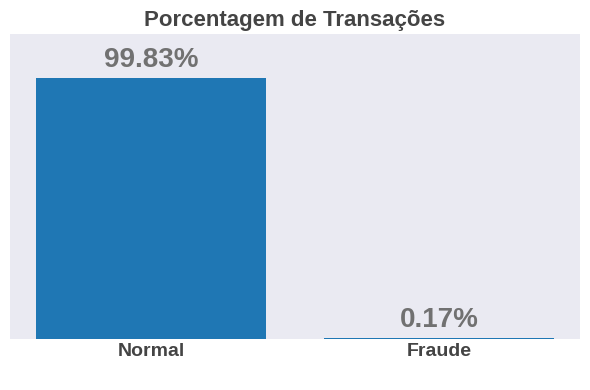

In [8]:
# @title Gráfico de Balanceamento
# pegar o total de transações normais e fraudulentas
[normal_transactions, fraud_transactions] = transactions.Class.value_counts()

# calcular a porcentagem de transações
normal_transactions_ratio = normal_transactions / transactions.shape[0] * 100
fraud_transactions_ratio = fraud_transactions / transactions.shape[0] * 100

# alterar estilo da plotagem
plt.style.use('seaborn-v0_8-dark')

# criar uma figura para plotar
fig, ax = plt.subplots(figsize=(6, 4))

# plotar gráfico de barras para transções Normais e de Fraude
ax.bar(['Normal', 'Fraude'], [normal_transactions, fraud_transactions])

# adicionar título
ax.set_title('Porcentagem de Transações',
             fontsize=16,
             fontweight='semibold',
             color='#444')

# alterar o tamanho da fonte do eixo x
ax.set_xticks(['Normal', 'Fraude'])
ax.set_xticklabels(ax.get_xticklabels(),
                   fontsize=14,
                   fontweight='semibold',
                   color='#444')

# adionar uma label vazia para aparecer a barra de Fraude
ax.set_xlabel(' ')

# remover os valores no eixo y
ax.set_yticks([])

# adicionar anotações
ax.annotate(f'{round(normal_transactions_ratio, 2)}%',
            ('Normal', normal_transactions),
            xytext=(0, 8),
            textcoords='offset points',
            ha='center',
            color='#717171',
            fontsize=20,
            fontweight='semibold')

ax.annotate(f'{round(fraud_transactions_ratio, 2)}%',
            ('Fraude', fraud_transactions),
            xytext=(0, 8),
            textcoords='offset points',
            ha='center',
            color='#717171',
            fontsize=20,
            fontweight='semibold')

# aumentar o eixo y para comportar as anotações
ax.set_ylim(0, normal_transactions + 48000)

plt.tight_layout()

### Distribuições

Agora vamos dar uma olhada na distribuição da variável **`Amount`** e **`Time`** para quando a transação é **`Normal`** ou **`Fraude`**.

In [9]:
# criar uma função para ajudar na plotagem
def plot_variable_hist(transactions, variable):
  # criar figura
  fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

  # histograma para transações normais
  ax0.hist(transactions[transactions.Class == 0][variable])

  # histograma para transações fraudulentas
  ax1.hist(transactions[transactions.Class == 1][variable])

  # adionar título
  fig.suptitle(f'Distribuição da Variável {variable}', fontsize=20)

  # adionar legendas
  ax0.set_xlabel('Transações Normais', fontsize=16)
  ax1.set_xlabel('Transações Fraudulentas', fontsize=16)

  # mostrar gráficos
  plt.tight_layout()

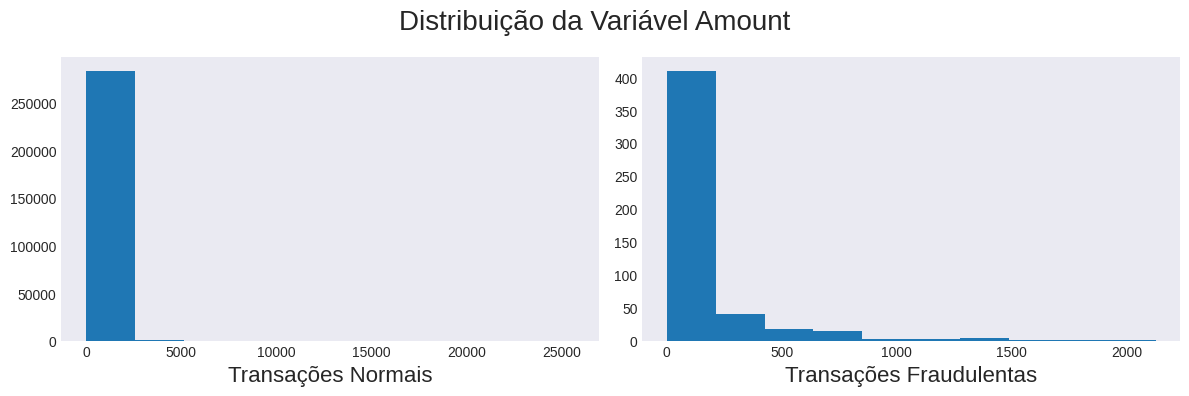

In [10]:
# plotar histograma da variável Amount
plot_variable_hist(transactions, 'Amount')

Olhando para as distribuições da variável `Amount` acima, notamos que há presença de valores **`outliers`** nessa variável. Isso pode acabar afetando a performance de generalização de nosso modelo.

Portanto, iremos fazer um tratamento dessa variável, antes de usá-la nos nossos modelos. Como não há muitos casos de fraudes, irei deixar essa variável intacta para esses casos, ou seja, irei modificar apenas as transações normais.

**obs:** caso o desempenho do modelo fique muito abaixo do desejado, talves faça alguma transformação nas transações fraudulentas.

---
**`Nota`**: outliers são valores que se diferenciam demais dos outros valores.


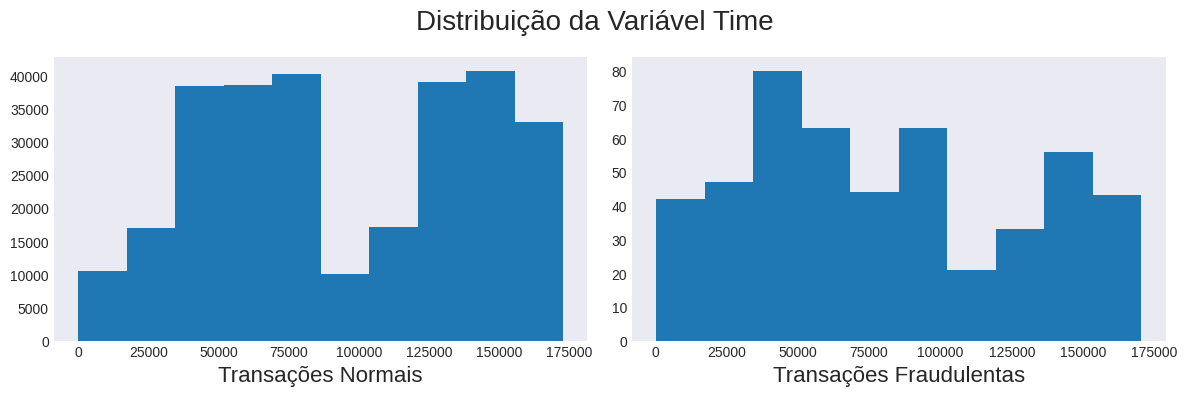

In [11]:
# plotar histograma da variável Time
plot_variable_hist(transactions, 'Time')

Já em relação à distribuição da variável `Time`, veja acima que os gráfico estão mais bem distribuidos(Perceba como para a variável `Amount` isso não ocorre). Isso é um grande indício de que não há valores `outliers` presentes. Portanto, vou deixar essa variável como está.

### Relações

Um último ponto para analisarmos antes de lidarmos com os outliers, é a relação entre as variáveis, é importante destacar, no entanto, que **relação é diferente de causa e efeito**. E nesse caso, estamos interessados em saber se existe alguma variável que colabora mais na detecção de fraude.

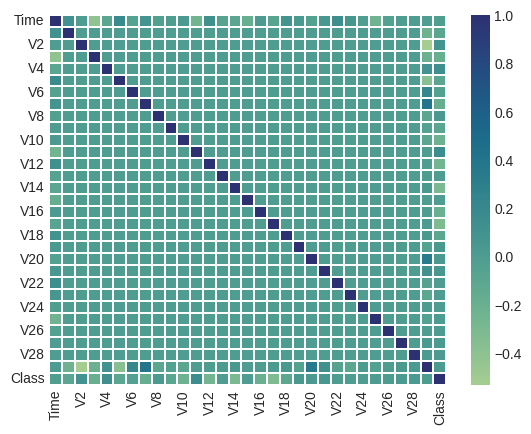

Correlação entre Amount e Class: 0.005631753006768552


In [12]:
# plotar gráfico de correlações
corr_matrix = transactions.corr()
sns.heatmap(corr_matrix, linewidth=.1, fmt='.2f',cmap="crest")
plt.show()

# mostrar relação entre a variável Amount e Class
print("Correlação entre Amount e Class:", corr_matrix['Class']['Amount'])

No mapa de calor acima, quanto mais escuros os quadrados são, mais positiva é a correlação, e quanto mais claros, mais negativa. Se concentramos a nossa atenção na linha da nossa variável alvo, `Class`, podemos notar que há variáveis que possuem algum tipo de correlação com `Class`.

**`obs:`** Note como a variável `Amount`, não possui muita correlação para prever se a transação é fraudulenta ou não. Veremos se conseguimos aumentar essa correlação após tratarmos dos outliers.

## Lidando com Outliers

Agora que já fizemos uma análise inicial, podemos começar a tratar aqueles `outliers` da variável `Amount`.

Para isso, usaremos a técnica do **IQR Score**. Essa técnica consiste em encontrar os outliers a partir desse score, o qual é calculado subtraindo-se o terceiro quartil do primeiro quartil. Calculado o score, podemos então definir um limite superior e inferior, que usamos de referência para detectar os outliers.

Além disso podemos usar a visualização `Box Plot`, para visualizarmos melhor os outliers.

Box plot antes de remover os outliers


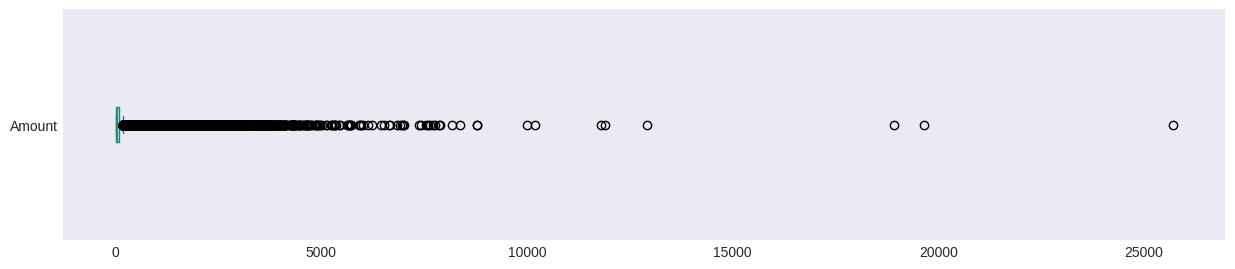

IQR Score: 71.40
Limite superior: 184.15
Limite inferior: -101.45

Valores acima do limite supeior: 31862
Corresponde a 11.19% do dataset


In [13]:
# separar apenas os dados das transações normais
normal_transactions_amount = transactions[transactions.Class == 0].Amount

# plotar box plot
print('Box plot antes de remover os outliers')
normal_transactions_amount.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# calcular o IQR Score
amount_Q1, amount_Q3 = normal_transactions_amount.quantile([.25, .75])
amount_IQR = amount_Q3 - amount_Q1

# calcular limites inferior e superior
amount_higher_limit = amount_Q3 + 1.5 * amount_IQR
amount_lower_limit = amount_Q1 - 1.5 * amount_IQR

print(f'IQR Score: {amount_IQR:.2f}')
print(f'Limite superior: {amount_higher_limit:.2f}')
print(f'Limite inferior: {amount_lower_limit:.2f}')

# calcular quantos valores estão acima do limite superior
values_beyond_higher_limit = (normal_transactions_amount > amount_higher_limit).sum()

print('\nValores acima do limite supeior:', values_beyond_higher_limit)
print(f'Corresponde a {values_beyond_higher_limit / transactions.shape[0] * 100:.2f}% do dataset')

Como os outliers correspondem a 11.19% do dataset, e temos muitos exemplos de transações normais, irei simplesmete remover todos os outliers. Para isso, primeiro criamos uma cópia de nosso dataset para mantermos os dados originais.

In [14]:
# criar uma cópia do dataset
transactions_clean = transactions.copy()

transactions_before_cleaning = transactions_clean.shape[0]

# remover os outliers
transactions_clean.drop(normal_transactions_amount[
                          normal_transactions_amount > amount_higher_limit
                        ].index,
                        axis=0,
                        inplace=True)

# mostrar a diferença
print('Nº de transações antes:', transactions_before_cleaning)
print('Nº de transações depois:', transactions_clean.shape[0])

Nº de transações antes: 284807
Nº de transações depois: 252945


Agora vejamos como ficou a distribuição e o box plot da variável `Amount` após essa limpeza.

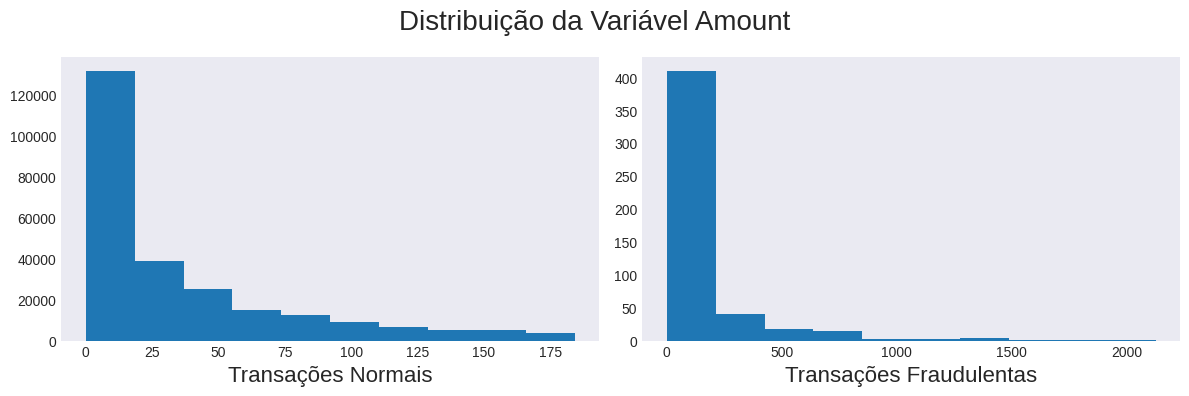

In [15]:
# plotar histograma da variável Amount
plot_variable_hist(transactions_clean, 'Amount')

Box plot depois de remover os outliers


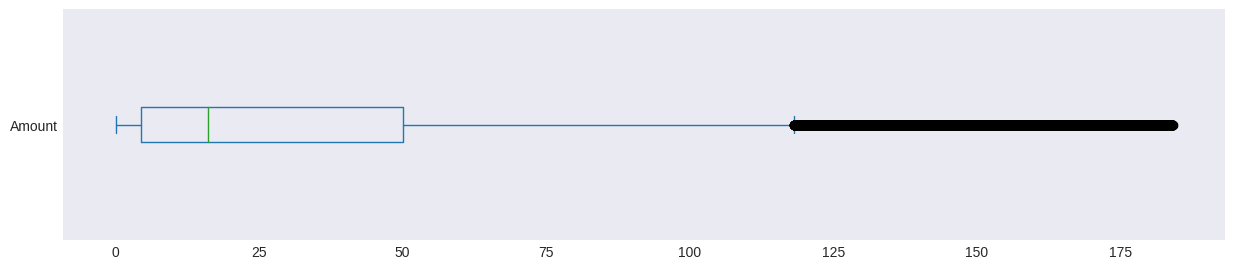

In [16]:
# separar apenas os dados das transações normais
normal_transactions_clean_amount = transactions_clean[transactions_clean.Class == 0].Amount

# plotar box plot
print('Box plot depois de remover os outliers')
normal_transactions_clean_amount.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

Perceba que agora, o histograma está mais bem distribuido e o box plot tem uma visualização melhor.

### Analisando as correlações novamente

Agora vejamos se fez alguma diferença em nossa matrix de correlações esta limpeza de outliers.

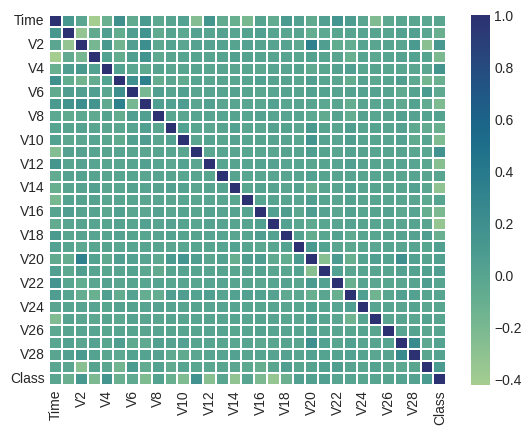

Correlação entre Amount e Class: 0.08789384913254487


In [17]:
# plotar gráfico de correlações nos dados limpos
corr_matrix_clean = transactions_clean.corr()
sns.heatmap(corr_matrix_clean, linewidth=.1, fmt='.2f', cmap="crest")
plt.show()

# mostrar relação entre a variável Amount e Class para os dados limpos
print("Correlação entre Amount e Class:", corr_matrix_clean['Class']['Amount'])

Perceba como houve um aumento na correlação. Antes era de `0.005`, agora está em `0.087`(se reparar na escala do mapa de calor, verá que é um aumento considerável).

## Criando o Modelo de Machine Learning

Agora que nossos dados já foram limpos, podemos começar a preparar os dados para os modelos de machine leanring.

#### Vamos seguir esses passos:
1.   Separar a variável alvo das demais variáveis;
2.   Separar os dados em dados de treino e de teste;
3.   Esacalonar as variáveis `Amount` e `Time`;
4.   Definir métricas de performance;
5.   Testar diferentes modelos de Machine Learning;
6.   Selecionar e melhorar os melhores modelos;
7.   Selecionar um modelo final e testar nos dados de teste.

### **1. Isolando a variável alvo**

In [18]:
# separar a variável alvo dos atributos
X = transactions_clean.drop('Class', axis=1)
y = transactions_clean['Class'].copy()

# mostrar o shape de X e y
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (252945, 30)
y shape: (252945,)


### **2. Separando os dados em treino e teste**

Agora vamos separar os dados de treino e teste. Para deixar os dados equilibrados, irei separá-los de tal forma que mantenham a mesma proporção entre transações normais e fraudulentas no conjunto de treino e teste.

In [19]:
# separar dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.2,
                                                    stratify=y,
                                                    random_state=42)

# mostrar o shape do conjunto de treino e teste
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("\nX_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# calcular proporções de casos de fraude
train_fraud_ratio = (y_train == 1).sum() / y_train.shape[0]
test_fraud_ratio = (y_test == 1).sum() / y_test.shape[0]

# mostrar proporções de casos de fraude
print('\nProporção de fraudes no conjunto de treino: {:.2f}%'.format(train_fraud_ratio * 100))
print('Proporção de fraudes no conjunto de teste: {:.2f}%'.format(test_fraud_ratio * 100))

X_train shape: (202356, 30)
y_train shape: (202356,)

X_test shape: (50589, 30)
y_test shape: (50589,)

Proporção de fraudes no conjunto de treino: 0.19%
Proporção de fraudes no conjunto de teste: 0.19%


### **3. Escalonando as variáveis `Amount` e `Time`**

Feita a divisão dos dados, não iremos mais tocar no conjunto de teste até o momento de avaliar o modelo final. Portanto, nosso trabalho irá se concentrar completamente nos dados de treino.

Uma coisa que precisamos fazer, é colocar as variáveis `Time` e `Amount` dentro de uma escala, pois até o momento, seus valores estão em uma escala muito diferente das variáveis `[V1, V2, ..., V28]`, e isso pode afetar o desempho de nossos modelos de machine learning.

Temos duas opções de escalonamento: normalização e padronização. A normalização limita os dados entre um limite minímo e máximo. Já a padronização não possui esses limites. Por simplicidade irei usar padronização, até porque as outras variáveis não parecem estar normalizadas(entre limites), sem falar que esta técnica é menos sensível a outliers.

In [20]:
# escalonar apenas as colunas Amount e Time
scaler = ColumnTransformer(
    [("scaler", StandardScaler(), ['Time', 'Amount'])],
    remainder='passthrough'
    )
X_train_transformed = scaler.fit_transform(X_train)

# mostrar shape dos dados transformados
print("X_train_transformed shape:", X_train_transformed.shape)
print("\nX_train_transformed valores:\n", X_train_transformed)

X_train_transformed shape: (202356, 30)

X_train_transformed valores:
 [[-3.57813053e-01 -7.76707565e-01  1.15936548e+00 ... -6.66794935e-01
   9.19244215e-02  1.69521613e-02]
 [ 1.45637093e+00  2.45041256e+00  2.43315724e-02 ... -7.10090789e-01
   4.84636433e-02 -1.33988274e-02]
 [ 1.36349591e+00 -5.15295351e-01 -2.14047825e-01 ...  1.22789454e-01
   9.47190903e-02  2.03802370e-02]
 ...
 [ 1.17028476e+00 -6.85623170e-01  9.23846533e-02 ... -6.89587897e-01
   1.09155571e-01  6.25652437e-02]
 [ 3.85670520e-01 -7.79212386e-01  2.06632618e+00 ...  1.74662493e-01
  -5.78754091e-02 -3.04463698e-02]
 [ 6.15493639e-01 -6.59436406e-01  1.99374283e+00 ...  1.50570254e-03
  -8.41517845e-02 -6.09949885e-02]]


### **4. Definindo as Métricas**

Chegamos a um ponto crucial: definir as métricas para avaliar nossos modelos. Temos que escolher as melhores métricas que funcionem para os dados que temos.

Como disse anteriormente, usar a acurácia não é uma boa ideia em nossa situação, por causa do seguinte:
* Os dados estão muito desbalanceados;
* As transações normais representam 99.83% de todos os dados;
* As transações fraudulentas representam apenas 0.17% de todos os dados.

Ou seja, se testarmos nosso modelo em todos os dados, caso ele classifique todas as transações como normais, ele teria a incrível acurácia de 99.83%. E caso contrário, teria uma acurácia de 0.17%. Logo, devido ao desbalanceamento dos dados, essa métrica torna-se muito ruim.

<br>

---

#### **Matriz de Confusão**
Portanto, usaremos uma matriz de confusão para avaliar nossos modelos, pois a partir dela conseguimos extrair outras métricas.

Basicamente uma matriz de confusão, é uma matriz como esta:

$$
\begin{bmatrix}
  PV & PF\\
  NF & NV
\end{bmatrix}
$$

Onde:
* **PV:** Positivos verdadeiros
* **PF:** Positivos falsos
* **NF:** Negativos falsos
* **NV:** Negativos verdadeiros

No nosso caso, os casos positivos são as transações fraudulentas e os casos negativos, as normais.

Com essa matriz, conseguimos avaliar quantos casos nosso modelo preveu corretamente, e quantos erroneamente. E para facilitar, temos algumas métricas que podemos retirar dessa matriz, são elas:

* **Precision** mede a proporção de previsões positivas corretas:

$$
\frac{PV}{PV + PF}
$$

<br>

* **Recall** mede a proporção de positivos classificados corretamente, considerando o total de todas as classificações que de fato são positivas:

$$
\frac{PV}{PV + NF}
$$

<br>

* **F1-score** combina `Precision` e `Recall`. Quanto maior o valor mais equilibrado estam a `Precision` e `Recall`:

$$
2 * \frac{Precision * Recall}{Precision + Recall}
$$

<br>

* **AUC** mostra o quão bom o modelo é em distinguir as classes. Como a fórmula não é simples, não vou colocá-la aqui.

No nosso caso, um valor alto para precision significa que, de todas as instâncias detectadas como fraudulentas a maioria estava correta. Já um valor alto de recall, significa que nosso modelo consegue encontrar a maioria dos casos realmente fraudulentos. Oque queremos é um modelo que tenha um recall alto, pois queremos detectar o maior número de verdadeiras fraudes possível, porém isso pode nos custar uma precisão mais baixa, então caso seja possível iremos querer um modelo que não tenha uma precisão baixa, porque isso significaria que muitos clientes normais seriam encomodados por suspeita de fraude, ou seja queremos que o F1-score e AUC sejam altos.

<br>

---

#### **Cross-validation**
Além da matriz de confusão, também usaremos a validação cruzada (Cross-validation) para avaliar o quão bem nosso modelo consegue generalizar.

Um problema ao treinar modelos de machine learning é que eles podem sofrer de **`overfitting`**, quando um modelo se sai bem nos dados de treino, mas mal nos dados novos não vistos antes, ou **`underfitting`**, quando o modelo se sai mal tanto nos dados de treino quanto nos dados novos.

Para solucionar o underfitting, você pode tentar treinar mais o seu modelo. No entanto, se você treinar muito o seu modelo, ele pode sofrer de overfitting. É aí que podemos usar a cross-validation. Basicamente, essa técnica divide o nosso conjunto de treino em várias partes e, em seguida, treina o modelo com cada uma das partes individualmente e o testa com as partes que não foram usadas para treinamento. No final desse processo, podemos avaliar se nosso modelo está sofrendo de overfitting com base no desempenho de cada modelo treinado por meio dessa técnica.

---

#### **Undersampling**
Como vimos anteriormente nossos dados estão extremamente desbalanceados, e isso pode afetar o desempenho de nossos modelos posteriormente, já que eles vão ter mais exemplos de oque não é fraude que exemplos de fraude. Por isso, convém utilizar uma técnica chamanda Undersampling(Subamostragem), que consiste em remover aleatoriamente exemplos da classe majoritária, no caso a classe com transações normais, para igualar o número de exemplos na classe minoritária. Dessa forma teremos um conjunto de treino mais balanceado e que, por conseqûencia, terá um treinamento mais rápido, por ter menos exemplos.

#### Trantando o desbalanceamento

Antes de testar os modelos, utilizaremos a técnica de undersampling. Para não ficarmos com poucos dados de treino, ao invés de igualar o número de intâncias normais e fraudulentas, iremos deixar que as instâncias normais fiquem com mais valores, continuando com um desbalanceamento, porém menos atenuado.

In [21]:
# aplicando undersampling nos dados de treino com estratégia igual a 0.3
under_sampler = RandomUnderSampler(sampling_strategy=0.3, random_state=42)
X_resampled, y_resampled = under_sampler.fit_resample(X_train_transformed, y_train)

In [22]:
# verificar o shape de X_resampled e y_resampled
print('X_resampled shape:', X_resampled.shape)
print('y_resampled shape:', y_resampled.shape)

resampled_total = y_resampled.shape[0]
resampled_normal_count = sum(y_resampled == 0)
resampled_fraud_count = sum(y_resampled == 1)

# calculando o desbalanceamento final
print('\nInstâncias normais: {}({:.2f}%)'.format(
    resampled_normal_count,
    resampled_normal_count / resampled_total * 100))

print('Instâncias fraudulentas: {}({:.2f}%)'.format(
    resampled_fraud_count,
    resampled_fraud_count / resampled_total * 100))

X_resampled shape: (1707, 30)
y_resampled shape: (1707,)

Instâncias normais: 1313(76.92%)
Instâncias fraudulentas: 394(23.08%)


### **5. Testando diferentes modelos de Machine Learning**

Nessa estapa, criarei uma função para me auxiliar a testar os diferentes modelos de classificação existente. Basicamente nossa função treinará o modelo que eu informar com os dados de treino e em seguida aplicará cross-validation e por fim mostrará as métricas definidas anteriormente.

Vamos testar os seguintes modelos:
*  **`Logistic Regression`**
*  **`Support Vector Classification`**
*  **`Gaussian Naive Bayes`**
*  **`Random Forest Classifier`**

In [23]:
# função para auxiliar na avaliação dos modelos
def evaluate_model(model, folds):

  # treinar modelo
  model.fit(X_resampled, y_resampled)
  y_pred = model.predict(X_resampled)

  # aplicar cross validation
  val_y_pred = cross_val_predict(
      model,
      X_resampled,
      y_resampled,
      cv=StratifiedKFold(folds, shuffle=True, random_state=42), # manter as distribuições dos dados
  )

  # matriz de confusão
  conf_mat = confusion_matrix(y_resampled, y_pred)
  val_conf_mat = confusion_matrix(y_resampled, val_y_pred)

  # mostrar matriz de confusão e métricas
  print('Métricas de treino')

  plt.figure(figsize=(2, 2))
  sns.heatmap(conf_mat, square=True, annot=True, fmt='d', cbar=False)
  plt.xlabel('Previsão do modelo')
  plt.ylabel('Valor verdadeiro')

  plt.show()

  print(classification_report(
      y_resampled,
      y_pred,
      target_names=['Normal', 'Fraud'], digits=5))

  print('AUC:', roc_auc_score(y_resampled, y_pred))

  print('\n\nMétricas de validação cruzada')

  plt.figure(figsize=(2, 2))
  sns.heatmap(val_conf_mat, square=True, annot=True, fmt='d', cbar=False)
  plt.xlabel('Previsão do modelo')
  plt.ylabel('Valor verdadeiro')

  plt.show()

  print(classification_report(
      y_resampled,
      val_y_pred,
      target_names=['Normal', 'Fraud'], digits=5))

  print('AUC:', roc_auc_score(y_resampled, val_y_pred))


#### Logistic Regression

Métricas de treino


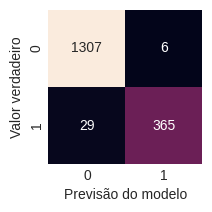

              precision    recall  f1-score   support

      Normal    0.97829   0.99543   0.98679      1313
       Fraud    0.98383   0.92640   0.95425       394

    accuracy                        0.97950      1707
   macro avg    0.98106   0.96091   0.97052      1707
weighted avg    0.97957   0.97950   0.97928      1707

AUC: 0.9609131256741449


Métricas de validação cruzada


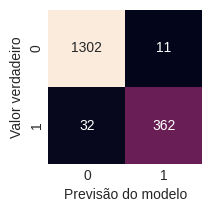

              precision    recall  f1-score   support

      Normal    0.97601   0.99162   0.98376      1313
       Fraud    0.97051   0.91878   0.94394       394

    accuracy                        0.97481      1707
   macro avg    0.97326   0.95520   0.96385      1707
weighted avg    0.97474   0.97481   0.97456      1707

AUC: 0.9552019825176582


In [24]:
evaluate_model(LogisticRegression(random_state=42), 5)

#### Support Vector Classification

Métricas de treino


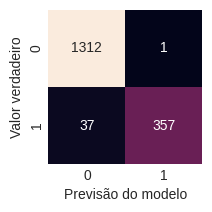

              precision    recall  f1-score   support

      Normal    0.97257   0.99924   0.98573      1313
       Fraud    0.99721   0.90609   0.94947       394

    accuracy                        0.97774      1707
   macro avg    0.98489   0.95266   0.96760      1707
weighted avg    0.97826   0.97774   0.97736      1707

AUC: 0.9526648779676874


Métricas de validação cruzada


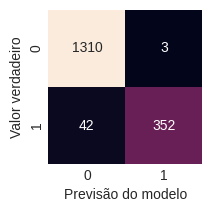

              precision    recall  f1-score   support

      Normal    0.96893   0.99772   0.98311      1313
       Fraud    0.99155   0.89340   0.93992       394

    accuracy                        0.97364      1707
   macro avg    0.98024   0.94556   0.96152      1707
weighted avg    0.97415   0.97364   0.97314      1707

AUC: 0.945558085679712


In [25]:
evaluate_model(SVC(random_state=42), 5)

#### Gaussian Naive Bayes

Métricas de treino


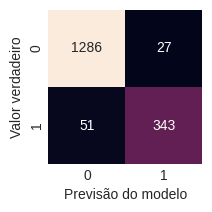

              precision    recall  f1-score   support

      Normal    0.96185   0.97944   0.97057      1313
       Fraud    0.92703   0.87056   0.89791       394

    accuracy                        0.95431      1707
   macro avg    0.94444   0.92500   0.93424      1707
weighted avg    0.95382   0.95431   0.95380      1707

AUC: 0.9249973904067486


Métricas de validação cruzada


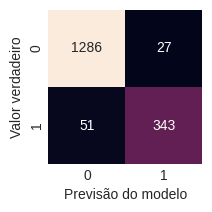

              precision    recall  f1-score   support

      Normal    0.96185   0.97944   0.97057      1313
       Fraud    0.92703   0.87056   0.89791       394

    accuracy                        0.95431      1707
   macro avg    0.94444   0.92500   0.93424      1707
weighted avg    0.95382   0.95431   0.95380      1707

AUC: 0.9249973904067486


In [26]:
evaluate_model(GaussianNB(), 5)

#### Random Forest Classifier

Métricas de treino


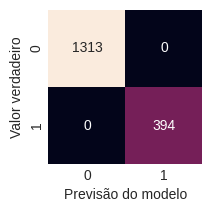

              precision    recall  f1-score   support

      Normal    1.00000   1.00000   1.00000      1313
       Fraud    1.00000   1.00000   1.00000       394

    accuracy                        1.00000      1707
   macro avg    1.00000   1.00000   1.00000      1707
weighted avg    1.00000   1.00000   1.00000      1707

AUC: 1.0


Métricas de validação cruzada


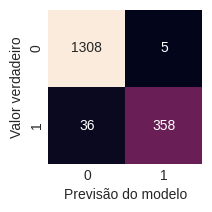

              precision    recall  f1-score   support

      Normal    0.97321   0.99619   0.98457      1313
       Fraud    0.98623   0.90863   0.94584       394

    accuracy                        0.97598      1707
   macro avg    0.97972   0.95241   0.96520      1707
weighted avg    0.97622   0.97598   0.97563      1707

AUC: 0.9524106842546808


In [27]:
evaluate_model(RandomForestClassifier(random_state=42), 5)

#### **Considerações**

Segue as considerações sobre cada modelo:

* **Logistic Regression**

    Esse modelo está **entre os melhores** que foram testados, pois além de não haver indícios de overfitting(as métricas de treino e validção são bastante semelhantes), ele ainda apresenta um ótimo **recall de 0.92**.

<br>

* **Support Vector Classification**

    Esse modelo não tem indícios de overfitting e possuí métricas legais(não são as melhores). **Talvez com parâmetros diferentes tenha alguma melhora**.

<br>

* **Gaussian Naive Bayes**

    Esse modelo não apresenta indícios de overfitting, contudo, é o que apresenta **menor recall(0.87)**, que é prioridade como discutido anteriormente, por isso não pretendo continuar com ele.

<br>

* **Random Forest Classifier**

    Este modelo, de longe, é o com **mais overfitting**, pois ele performa com métricas 1.0 nos dados de treino, porém isso não se replica nos dados de validação(apesar de ainda ter métricas boas). Contudo, esse modelo possui **diversos ajustes que podem melhorar** sua performance.

<br>

Feitas as considerações, vamos presseguir com os modelos: `Logistic Regression`, `Support Vector Classification` e `Random Forest Classifier`.

### **6. Melhorando os Modelos**

Nesta etapa iremos buscar encontrar os melhores hipreparâmetros para os modelos que selecionamos na etapa anterior. Buscamos métricas melhores evitando overfitting e ao final selecionaremos o melhor modelo. Para ajudar a encontrar esses parâmetros usaremos uma técnica chamada Grid Search, que testa diferentes conbinações de parâmetros que definirmos e avalia a melhor combinação. Contudo, essa técnica exige uma métrica de score para avaliar o melhor modelo, e como queremos um modelo com alto recall, mas que não tenha uma precisão tão baixa, ou seja queremos que nosso modelo distingua bem entre `Fraude` e `Normal`, portanto a métrica utilizada será AUC.

In [28]:
# função para avaliar o tuning do modelo
def evaluate_model_tuning(model, grid_search):
  search = GridSearchCV(
    model,
    grid_search,
    scoring='roc_auc',
    cv=StratifiedKFold(5, shuffle=True, random_state=42), # manter a distribuição dos dados
    n_jobs=-1)

  search.fit(X_resampled, y_resampled)

  print('Melhor:', search.best_params_)

  evaluate_model(clone(search.best_estimator_), 5)

  return search

#### Afinando Logistic Regression

Melhor: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Métricas de treino


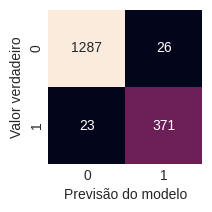

              precision    recall  f1-score   support

      Normal    0.98244   0.98020   0.98132      1313
       Fraud    0.93451   0.94162   0.93805       394

    accuracy                        0.97129      1707
   macro avg    0.95848   0.96091   0.95969      1707
weighted avg    0.97138   0.97129   0.97133      1707

AUC: 0.9609111926421069


Métricas de validação cruzada


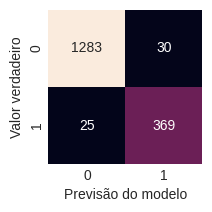

              precision    recall  f1-score   support

      Normal    0.98089   0.97715   0.97902      1313
       Fraud    0.92481   0.93655   0.93064       394

    accuracy                        0.96778      1707
   macro avg    0.95285   0.95685   0.95483      1707
weighted avg    0.96794   0.96778   0.96785      1707

AUC: 0.9568498923301155


In [29]:
# definir os parâmetros para testar
lr_param_grid = [
    {
      'C' : [0.1, 0.2, 0.5, 1.0, 5.0],
      'solver' : ['lbfgs', 'newton-cg', 'sag'],
      'class_weight' : [None, 'balanced']
    },
    {
      'C' : [0.1, 0.2, 0.5, 1.0, 5.0],
      'solver' : ['liblinear'],
      'penalty' : ['l1', 'l2'],
      'class_weight' : [None, 'balanced']
    }
]

# avaliar o modelo
lr_search = evaluate_model_tuning(LogisticRegression(random_state=42), lr_param_grid)

#### Afinando Support Vector Classification

Melhor: {'C': 1.0, 'class_weight': 'balanced', 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Métricas de treino


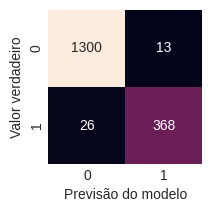

              precision    recall  f1-score   support

      Normal    0.98039   0.99010   0.98522      1313
       Fraud    0.96588   0.93401   0.94968       394

    accuracy                        0.97715      1707
   macro avg    0.97314   0.96205   0.96745      1707
weighted avg    0.97704   0.97715   0.97702      1707

AUC: 0.962054581092627


Métricas de validação cruzada


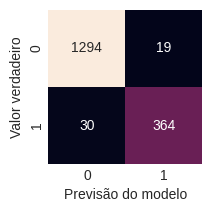

              precision    recall  f1-score   support

      Normal    0.97734   0.98553   0.98142      1313
       Fraud    0.95039   0.92386   0.93694       394

    accuracy                        0.97129      1707
   macro avg    0.96387   0.95469   0.95918      1707
weighted avg    0.97112   0.97129   0.97115      1707

AUC: 0.9546935950916451


In [30]:
# definir os parâmetros para testar
svc_param_grid = {
    'C' : [0.1, 0.5, 1.0],
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree' : [1, 2, 3],
    'gamma' : ['scale', 'auto', 0.1, 0.2],
    'class_weight' : [None, 'balanced']
}

# avaliar o modelo
svc_search = evaluate_model_tuning(SVC(random_state=42), svc_param_grid)

#### Afinando Random Forest Classifier

Melhor: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 8, 'n_estimators': 70}
Métricas de treino


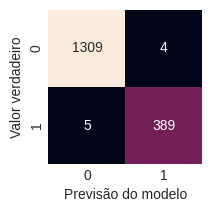

              precision    recall  f1-score   support

      Normal    0.99619   0.99695   0.99657      1313
       Fraud    0.98982   0.98731   0.98856       394

    accuracy                        0.99473      1707
   macro avg    0.99301   0.99213   0.99257      1707
weighted avg    0.99472   0.99473   0.99473      1707

AUC: 0.9921315930890239


Métricas de validação cruzada


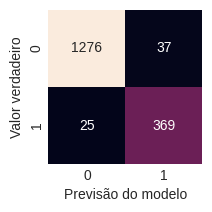

              precision    recall  f1-score   support

      Normal    0.98078   0.97182   0.97628      1313
       Fraud    0.90887   0.93655   0.92250       394

    accuracy                        0.96368      1707
   macro avg    0.94483   0.95418   0.94939      1707
weighted avg    0.96418   0.96368   0.96387      1707

AUC: 0.9541842411496129


In [31]:
# definir os parâmetros para testar
forest_param_grid = {
    'n_estimators' : [70, 80, 90],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_depth' : [6, 7, 8],
    'class_weight' : [None, 'balanced']
}

# avaliar o modelo
forest_search = evaluate_model_tuning(RandomForestClassifier(random_state=42), forest_param_grid)

### **7. Modelo Final**

Após testar vários parâmetros diferentes para cada modelo, chegamos a seguinte conclusão:

* **Logistic Regression:** esse modelo não aparenta estar com overfitting, e suas métricas são bem equilibradas entre recall e precision.

* **Support Vector Classification:**  esse modelo está muito semelhante ao Logistic Regression, porém comete mais erros de classificar Fraude.

* **Random Forest Classifier:** este modelo consegue ter excelentes métricas nos dados de treinamento, mas quando é testado na validação suas métricas pioram, ou seja esse modelo manteve-se com overfitting.

Por essas razões, o modelo final será Logistic Regression, pois não possui overfitting e suas métricas são bem equilibradas com um bom recall.

---

#### **Testando o modelo nos dados de teste**

Agora veremos se o modelo consegue performar bem nos dados de teste, ou seja os dados que eu separei anteriormente, e que o modelo nunca teve contato.

Resultado do modelo final


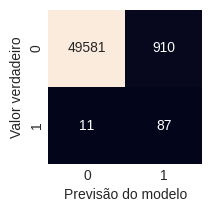

              precision    recall  f1-score   support

      Normal    0.99978   0.98198   0.99080     50491
       Fraud    0.08726   0.88776   0.15890        98

    accuracy                        0.98179     50589
   macro avg    0.54352   0.93487   0.57485     50589
weighted avg    0.99801   0.98179   0.98919     50589

AUC: 0.9348660440191604


In [35]:
# separar o modelo final
final_model = lr_search.best_estimator_

# aplicar escalonamento nos dados de teste
X_test_prepared = scaler.transform(X_test)

# realizar as predições
y_pred = final_model.predict(X_test_prepared)

# mostrar resultados
print('Resultado do modelo final')

# matriz de confusão
conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(2, 2))
sns.heatmap(conf_mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Previsão do modelo')
plt.ylabel('Valor verdadeiro')
plt.show()

# métricas
print(classification_report(
    y_test,
    y_pred,
    target_names=['Normal', 'Fraud'], digits=5))

print('AUC:', roc_auc_score(y_test, y_pred))

## Conclusão

Conseguimos produzir um modelo final capaz de detectar grande parte dos casos de fraude. No final o modelo acabou com um recall de 0.88 nos dados de teste e 0.08 de precision, ou seja, nossa solução consegue prever muitos casos de fraude porém prevê muitos casos falsos. Em uma situação ideal o dataset precisaria ser mais balanceado para conseguir um equilíbrio maior entre recall e precision.